In [ ]:
import numpy as np
import pandas as pd
import csv
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
pointer1 = open('dataset_1.csv','r')
csv_pointer = csv.reader(pointer1)

raw_data = list()
total_data = list()
data_0 = list()
data_1 = list()
data_2 = list()
for row in csv_pointer:
    temp = row[0].split('\t')
    for i in range(len(temp)):
        temp[i] = float(temp[i])
    if int(temp[64]) == 0:
        data_0.append(temp[0:64])
    elif int(temp[64]) == 1:
        data_1.append(temp[0:64])
    elif int(temp[64]) == 2:
        data_2.append(temp[0:64])
    total_data.append(temp[0:64])
    raw_data.append(temp)

In [ ]:
#finding means for each category

# print(len(total_data))
# print(len(data_0))
# print(len(data_1))
# print(len(data_2))

mean = list()
mean_0 = list()
mean_1 = list()
mean_2 = list()

total_sum = [0]*(len(total_data[0]))

for i in range(len(total_data)):
    for j in range(len(total_data[0])):
        total_sum[j] = total_sum[j] + total_data[i][j]

for i in range(len(total_sum)):
    mean.append(total_sum[i]/len(total_data))

cat0_sum = [0]*(len(data_0[0]))
cat1_sum = [0]*(len(data_1[0]))
cat2_sum = [0]*(len(data_2[0]))

for i in range(len(data_0)):
    for j in range(len(data_0[0])):
        cat0_sum[j] = cat0_sum[j] + data_0[i][j]

for i in range(len(data_1)):
    for j in range(len(data_1[0])):
        cat1_sum[j] = cat1_sum[j] + data_1[i][j]

for i in range(len(data_2)):
    for j in range(len(data_2[0])):
        cat2_sum[j] = cat2_sum[j] + data_2[i][j]

for i in range(len(cat0_sum)):
    mean_0.append(cat0_sum[i]/len(data_0))

for i in range(len(cat1_sum)):
    mean_1.append(cat1_sum[i]/len(data_1))

for i in range(len(cat2_sum)):
    mean_2.append(cat2_sum[i]/len(data_2))


In [ ]:
#calculating S_b

mean_mat = np.array(mean).reshape(1,-1)
mean_mat0 = np.array(mean_0).reshape(1,-1)
mean_mat1 = np.array(mean_1).reshape(1,-1)
mean_mat2 = np.array(mean_2).reshape(1,-1)

temp1 = len(data_0)*((mean_mat0.T - mean_mat.T) @ (mean_mat0 - mean_mat))
temp2 = len(data_1)*((mean_mat1.T - mean_mat.T) @ (mean_mat1 - mean_mat))
temp3 = len(data_2)*((mean_mat2.T - mean_mat.T) @ (mean_mat2 - mean_mat))


S_b = temp1 + temp2 + temp3

#calculating S_w

sum_0 = np.array([[0] * len(data_0[0])] * len(data_0[0]))
for i in range(len(data_0)):
    temp = np.array(data_0[i]).reshape(1,-1)
    sum_0 = sum_0 + ((temp.T - mean_mat0.T) @ (temp - mean_mat0))

sum_1 = np.array([[0] * len(data_1[0])] * len(data_1[0]))
for i in range(len(data_1)):
    temp = np.array(data_1[i]).reshape(1,-1)
    sum_1 = sum_1 + ((temp.T - mean_mat1.T) @ (temp - mean_mat1))

sum_2 = np.array([[0] * len(data_2[0])] * len(data_2[0]))
for i in range(len(data_2)):
    temp = np.array(data_2[i]).reshape(1,-1)
    sum_2 = sum_2 + ((temp.T - mean_mat2.T) @ (temp - mean_mat2))

S_w = sum_0 + sum_1 + sum_2
# print(S_b[1])
# print(S_w[1])

In [ ]:
# calculating eigen vectors and values

eigen = np.linalg.eig(np.linalg.pinv(S_w) @ (S_b))

eigen_values1 = eigen[0]
eigen_vectors1 = eigen[1]
ind = np.argsort(eigen_values1)[::-1]

eigen_values = list()
for i in range(len(eigen_values1)):
    eigen_values.append(eigen_values1[ind[i]])


eigen_vectors = eigen_vectors1[:,ind]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


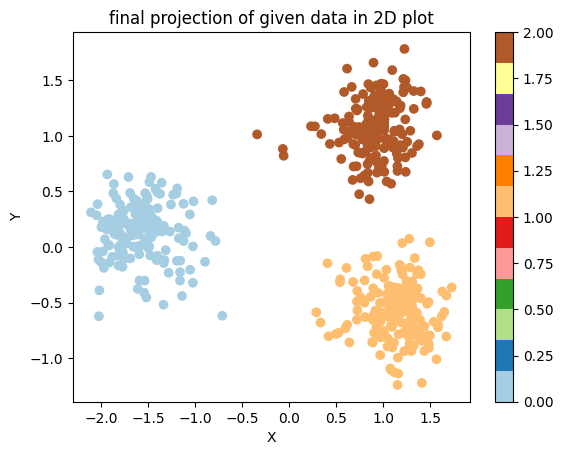

In [ ]:
# reducing this into 2 dimensions and plotting

W = eigen_vectors[:,:2]

total_mat = np.array(total_data)

final_projection = total_mat @ W

X = list()
Y = list()
cat = list()
for i in range(len(final_projection)):
    X.append(final_projection[i][0])
    Y.append(final_projection[i][1])
    if raw_data[i][64] == 0:
        cat.append(0)
    elif raw_data[i][64] == 1:
        cat.append(1)
    elif raw_data[i][64] == 2:
        cat.append(2)

# print(final_projection[1])
# for i in range(len(raw_data)):
#   print(raw_data[i][64])

plt.scatter(X,Y,cmap = 'Paired', c=cat)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('final projection of given data in 2D plot')
plt.show()


In [ ]:
# calculating for the same with normalisation with mean 0 and variance 1


data_shift = list()
for i in range(len(total_data)):
    temp = list()
    for j in range(len(total_data[i])):
        temp.append(total_data[i][j] - mean[j])
    data_shift.append(temp)

shifted_mat = np.array(data_shift)

# np_var = np.std(shifted_mat, axis=0)
# print(shifted_mat.shape)

var_list = list()
for j in range(len(total_data[0])):
    temp_sum = 0
    for i in range(len(total_data)):
        temp_sum += data_shift[i][j]**2
    var_list.append(temp_sum/(len(total_data)))

for i in range(len(var_list)):
    var_list[i] = var_list[i]**(0.5)


norm_data = list()
for i in range(len(data_shift)):
    temp = list()
    for j in range(len(data_shift[0])):
        if var_list[j] !=0:
            temp.append(data_shift[i][j]/var_list[j])
        else:
            temp.append(data_shift[i][j])
    norm_data.append(temp)

# print(norm_data[1])

In [ ]:
#now reducing the multidimensional to 2dimensional for the normalised data

norm_data0 = list()
norm_data1 = list()
norm_data2 = list()
norm_mean0 = list()
norm_mean1 = list()
norm_mean2 = list()

for i in range(len(data_shift)):
    if raw_data[i][64] == 0:
        norm_data0.append(data_shift[i])
    elif raw_data[i][64] == 1:
        norm_data1.append(data_shift[i])
    else:
        norm_data2.append(data_shift[i])

# calculating mean for the different caetegories data
norm_sum0 = [0]*(len(norm_data[0]))
norm_sum1 = [0]*(len(norm_data[1]))
norm_sum2 = [0]*(len(norm_data[2]))
for i in range(len(norm_data0)):
    for j in range(len(norm_data0[0])):
        norm_sum0[j] += norm_data0[i][j]

for i in range(len(norm_data1)):
    for j in range(len(norm_data1[0])):
        norm_sum1[j] += norm_data1[i][j]

for i in range(len(norm_data2)):
    for j in range(len(norm_data2[0])):
        norm_sum2[j] += norm_data2[i][j]

for i in range(len(norm_sum0)):
    norm_mean0.append(norm_sum0[i]/len(norm_data0))
    norm_mean1.append(norm_sum1[i]/len(norm_data1))
    norm_mean2.append(norm_sum2[i]/len(norm_data2))


In [ ]:
#calculating S_w and S_b for the normalized data

mean_mat = np.array([0]*(len(norm_data[0]))).reshape(1,-1)
norm_mean_mat0 = np.array(norm_mean0).reshape(1,-1)
norm_mean_mat1 = np.array(norm_mean1).reshape(1,-1)
norm_mean_mat2 = np.array(norm_mean2).reshape(1,-1)


temp1 = len(norm_data0)*((norm_mean_mat0.T - mean_mat.T) @ (norm_mean_mat0 - mean_mat))
temp2 = len(norm_data1)*((norm_mean_mat1.T - mean_mat.T) @ (norm_mean_mat1 - mean_mat))
temp3 = len(norm_data2)*((norm_mean_mat2.T - mean_mat.T) @ (norm_mean_mat2 - mean_mat))


norm_Sb = temp1 + temp2 + temp3

norm_sum0 = np.array([[0] * len(norm_data0[0])] * len(norm_data0[0]))
for i in range(len(norm_data0)):
    temp = np.array(norm_data0[i]).reshape(1,-1)
    sum_0 = sum_0 + ((temp.T - norm_mean_mat0.T) @ (temp - norm_mean_mat0))

sum_1 = np.array([[0] * len(norm_data1[0])] * len(data_1[0]))
for i in range(len(norm_data1)):
    temp = np.array(norm_data1[i]).reshape(1,-1)
    sum_1 = sum_1 + ((temp.T - norm_mean_mat1.T) @ (temp - norm_mean_mat1))

sum_2 = np.array([[0] * len(norm_data2[0])] * len(data_2[0]))
for i in range(len(norm_data2)):
    temp = np.array(norm_data2[i]).reshape(1,-1)
    sum_2 = sum_2 + ((temp.T - norm_mean_mat2.T) @ (temp - norm_mean_mat2))

norm_Sw = sum_0 + sum_1 + sum_2

# print(norm_Sb[1])
# print(norm_Sw[1])

In [ ]:
# calculating eigen vectors and values for normalised matrices

norm_eigen_values1, norm_eigen_vectors = np.linalg.eig(np.linalg.pinv(norm_Sw) @ (norm_Sb))

ind = np.argsort(norm_eigen_values1)[::-1]

norm_eigen_values = list()
for i in range(len(eigen_values1)):
    norm_eigen_values.append(eigen_values1[ind[i]])

norm_eigen_vectors = norm_eigen_vectors[:,ind]

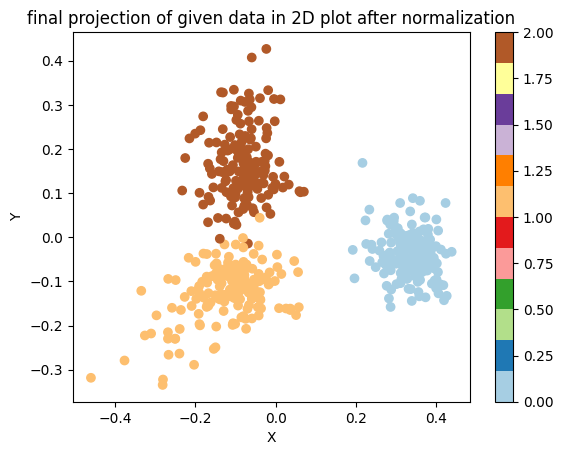

In [ ]:
# reducing the normalized data into 2 dimensions

norm_W = norm_eigen_vectors[:,:2]

norm_final_projection = np.array(norm_data) @ norm_W

X = list()
Y = list()
cat = list()
for i in range(len(norm_final_projection)):
    x = norm_final_projection[i][0].real
    y = norm_final_projection[i][1].real
    if math.sqrt(x*x + y*y) < 2:
      X.append(norm_final_projection[i][0].real)
      Y.append(norm_final_projection[i][1].real)
      if raw_data[i][64] == 0:
          cat.append(0)
      elif raw_data[i][64] == 1:
          cat.append(1)
      elif raw_data[i][64] == 2:
          cat.append(2)


plt.scatter(X,Y,cmap = 'Paired', c=cat)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('final projection of given data in 2D plot after normalization')
plt.show()


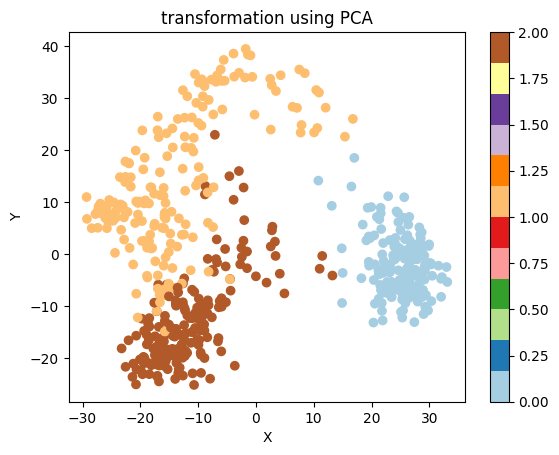

In [ ]:
# reducing the n-dimensional data to 2 -dimensional using pca

r = PCA(n_components = 2)

r.fit(total_data)

transformed_data = r.transform(total_data)

X = list()
Y = list()
cat = list()
for i in range(len(transformed_data)):
  if raw_data[i][64] == 0:
    cat.append(0)
  elif raw_data[i][64] == 1:
    cat.append(1)
  elif raw_data[i][64] == 2:
    cat.append(2)
  X.append(transformed_data[i][0])
  Y.append(transformed_data[i][1])

plt.scatter(X,Y,cmap = 'Paired', c= cat)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('transformation using PCA')
plt.show()


In [ ]:
import random
# doing naive bias algorithm
train_num = int(0.8 * len(total_data))
test_num = len(total_data) - train_num

train_ind = random.sample(list(range(len(total_data))) , train_num)

train_sample = list()
test_sample  = list()
train_data = list()
test_data = list()
train_data0 = list()
train_data1 = list()
train_data2 = list()

for i in range(len(total_data)):
    if i in train_ind:
        train_sample.append(raw_data[i])
        train_data.append(final_projection[i])
        if raw_data[i][64] == 0:
            train_data0.append(final_projection[i])
        elif raw_data[i][64] == 1:
            train_data1.append(final_projection[i])
        else:
            train_data2.append(final_projection[i])
    else:
        test_sample.append(raw_data[i])
        test_data.append(final_projection[i])


In [ ]:
print(len(train_data0))
print(len(train_data0[0]))

train_mat0 = np.array(train_data0)
train_mat1 = np.array(train_data1)
train_mat2 = np.array(train_data2)

print(train_mat0.shape)

train_mean0 = np.mean(train_mat0,axis= 0)

train_mean1 = np.mean(train_mat1,axis = 0)
train_mean2 = np.mean(train_mat2,axis = 0)
train_std0 = np.std(train_mat0 , axis = 0)
train_std1 = np.std(train_mat1 , axis = 0)
train_std2 = np.std(train_mat2 , axis = 0)


prob0 = len(train_data0)/len(train_data)
prob1 = len(train_data1)/len(train_data)
prob2 = len(train_data2)/len(train_data)

print(prob0)
print(prob1)
print(prob2)

139
2
(139, 2)
0.32400932400932403
0.34032634032634035
0.3356643356643357


In [ ]:
def finding_prob(x,mean,std):
    if std == 0:
        if x == mean:
            return 1
        else:
            return 0
    return (1/(math.sqrt(2*math.pi)*std))*((math.e)**(-((x-mean)**2)/(2*std*std)))

def prediction(l):
    #calculating the probability of l in cat0
    pl0 = prob0
    for i in range(len(l)):
        pl0 = pl0*finding_prob(l[i],train_mean0[i],train_std0[i])
    pl1 = prob1
    for i in range(len(l)):
        pl1 = pl1* finding_prob(l[i],train_mean1[i],train_std1[i])
    pl2 = prob2
    for i in range(len(l)):
        pl2 = pl2* finding_prob(l[i],train_mean2[i],train_std2[i])

    if pl0>= pl2 and pl0 >= pl1:
        return 0
    elif pl1>=pl2 and pl1 >= pl0:
        return 1
    else:
        return 2

In [ ]:
train_crt_pred = 0
train_label = list()
train_pred = list()
for i in range(len(train_data)):
    k = prediction(train_data[i])
    train_pred.append(k)
    train_label.append(train_sample[i][64])
    if k == train_sample[i][64]:
        train_crt_pred+=1
print(f'accuracy of the train data naive bayes classifier is {train_crt_pred/len(train_data)*100}')
crt_pred = 0
test_pred = list()
test_label = list()
for i in range(len(test_data)):
    k = prediction(test_data[i])
    test_pred.append(k)
    test_label.append(test_sample[i][64])
    if k == test_sample[i][64]:
        crt_pred +=1

print(f'accuracy of the test data naive bayes classifier is {crt_pred/len(test_data)*100}')

accuracy of the train data naive bayes classifier is 100.0
accuracy of the test data naive bayes classifier is 100.0


(453, 575)
(453, 575)


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


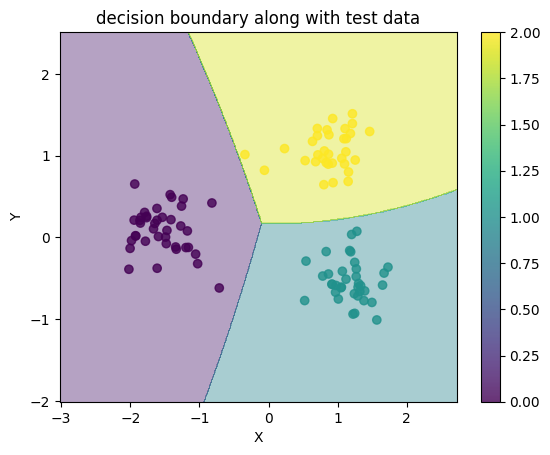

In [ ]:
# plotting decision boundary and confusion matrix for test and train data\
import seaborn as sns

test_data_mat = np.array(test_data)

x_min, x_max = (test_data_mat[:,0]).min() - 1, (test_data_mat[:,0]).max() + 1
y_min, y_max = (test_data_mat[:,1]).min() - 1, (test_data_mat[:,1]).max() + 1

xx, yy = np.meshgrid(np.arange(x_min.real, x_max.real, 0.01),
                     np.arange(y_min.real, y_max.real, 0.01))
print(xx.shape)
print(yy.shape)

Z = list()
for i in range(len(xx)):
  temp = list()
  for j in range(len(xx[0])):
    temp.append(prediction([xx[i][j],yy[i][j]]))
  Z.append(temp)

test_sample_mat = np.array(test_sample)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(test_data_mat[:, 0], test_data_mat[:, 1], c=test_sample_mat[:,64], alpha=0.8)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('decision boundary along with test data')
plt.show()

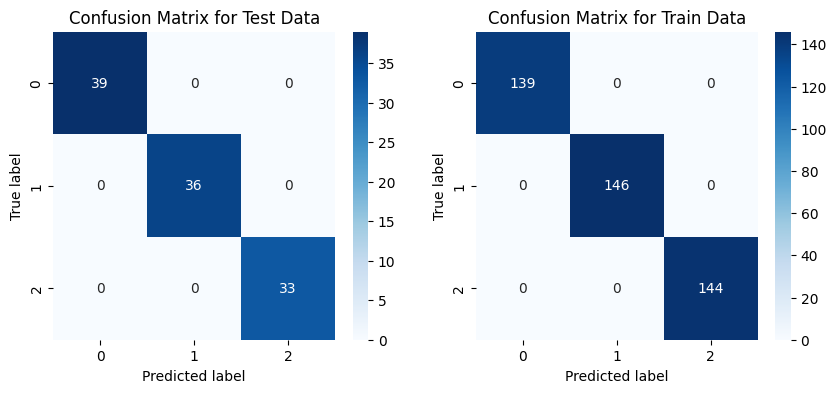

In [ ]:
#printing confusion matrices
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(test_label,test_pred)
cm2 = confusion_matrix(train_label,train_pred)

fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Plot the first confusion matrix
cmap = plt.cm.Blues
sns.heatmap(cm1, annot=True, fmt='d',cmap=cmap,ax=axs[0])
axs[0].set_xlabel("Predicted label")
axs[0].set_ylabel("True label")
axs[0].set_title("Confusion Matrix for Test Data")

# Plot the second confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap=cmap,ax=axs[1])
axs[1].set_xlabel("Predicted label")
axs[1].set_ylabel("True label")
axs[1].set_title("Confusion Matrix for Train Data")

plt.show()